In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
d_fn = "./../drawing/canvasses.npy"
drawings = np.load(d_fn)

In [3]:
drawings.shape

(5, 200, 16384)

[136]
(5, 2)
0 -9.124282e-32 -0.42668828 -0.07767164 0.12600696
1 -0.10048837 -2.2222116 -0.8120773 0.46482944
2 -0.20321888 -3.9717803 -1.6952896 0.91369694
3 -0.3127609 -5.875483 -2.6441584 1.3842683
4 -0.4159775 -7.9174967 -3.7611518 1.9202453


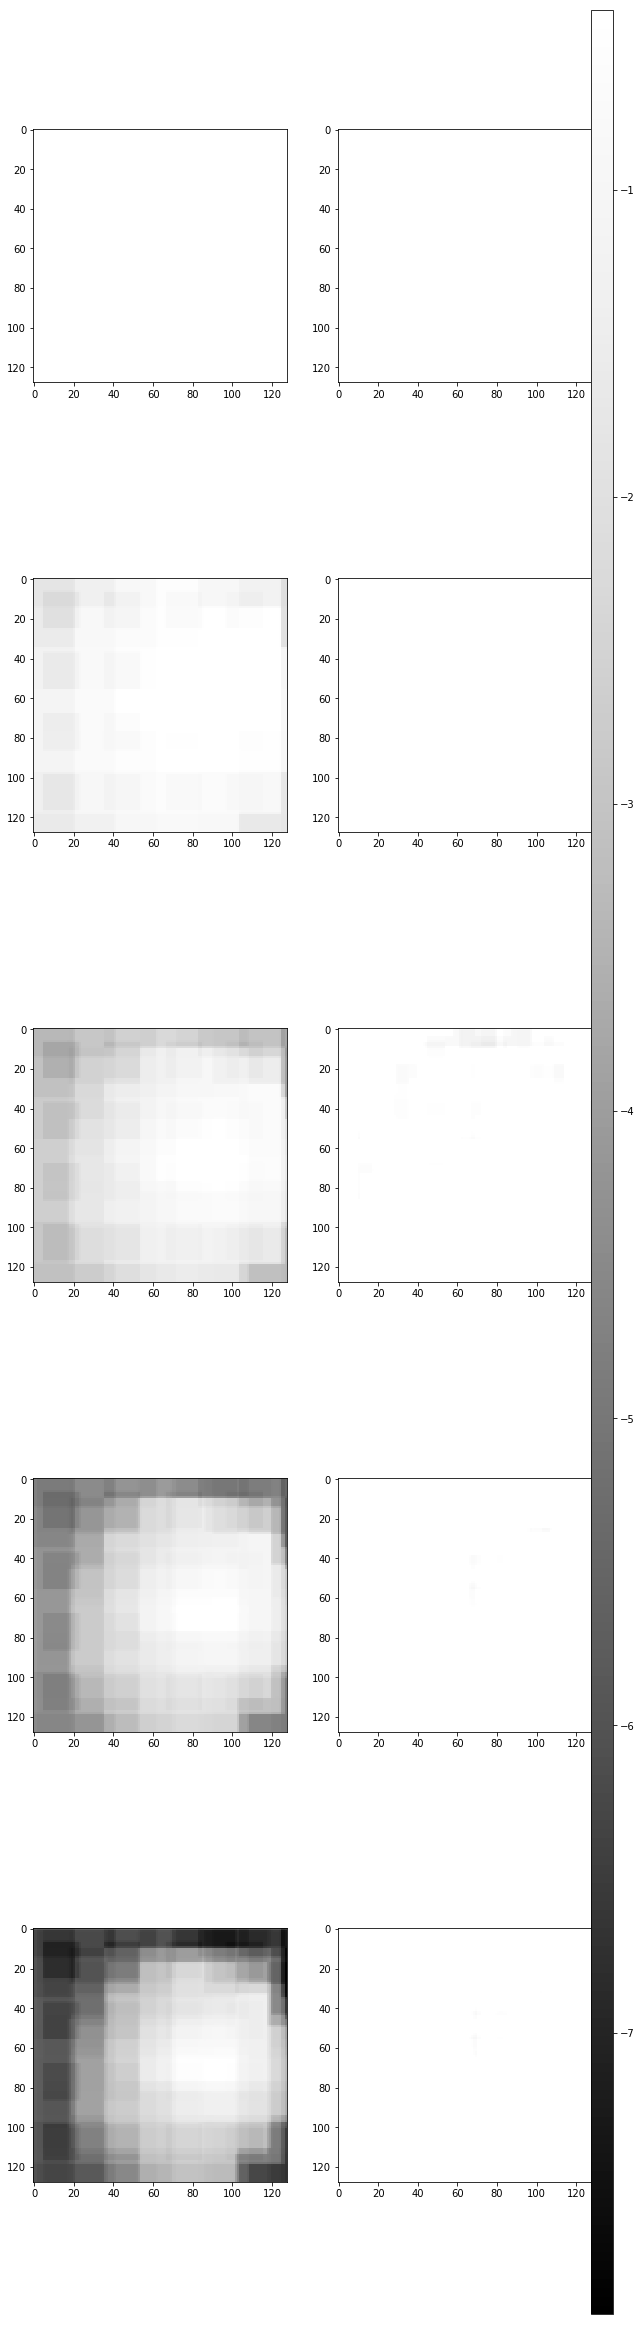

In [4]:
T = drawings.shape[0]
n_plots = 2
which = np.random.randint(0, drawings.shape[1], (1,))
ref = 1
print(which)
vmax = np.max(drawings[T-1][which[0]])
vmin = np.min(drawings[T-1][which[0]])

fig, ax = plt.subplots(nrows=T, ncols=n_plots, figsize=(10, 40) )
print(ax.shape)

for t in range(T):
    ao = ax[t]
    w = which[0]
    normal = drawings[t][w].reshape((128, 128)) #- drawings[0][w].reshape((128, 128))
    delta = drawings[t][w].reshape((128, 128)) - drawings[t][ref].reshape((128, 128))
    ao[0].imshow(normal, vmin=vmin, vmax=vmax, cmap="Greys_r")
    im = ao[1].imshow(delta, vmin=vmin, vmax=vmax, cmap="Greys_r")
    print(t, np.max(normal), np.min(normal), np.average(normal), np.std(normal))
    
cax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
fig.colorbar(im, cax=cax)

In [5]:
finished = drawings[-1:,:,].reshape((200, 128, 128))

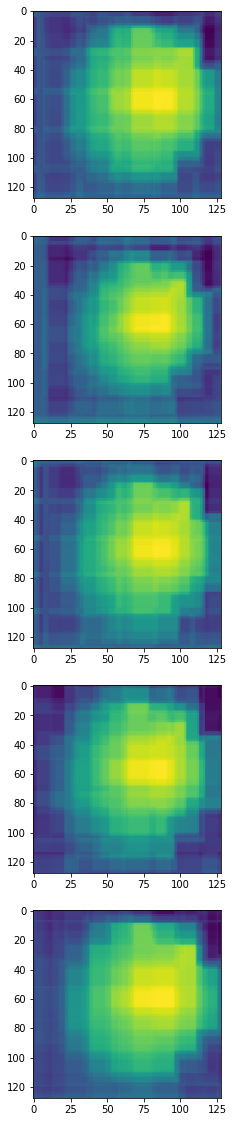

In [6]:
fig, axs = plt.subplots(5, figsize=(10, 20))
[ax.imshow(finished[i]) for i, ax in enumerate(axs)]

In [7]:
import matplotlib.image as mping

img = mping.imread("../plots∕loss_functions.png")
plt.imshow(img)

FileNotFoundError: [Errno 2] No such file or directory: '../plots∕loss_functions.png'